In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import techniques

In [18]:
x = np.arange(start = -3, stop = 3, step = 0.01) 
y = np.sin(x) + 1.5*np.random.normal(loc = 1, scale = 0.3, size = x.shape[0])

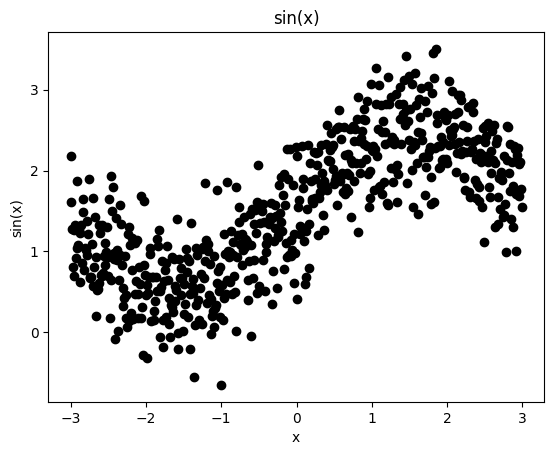

In [19]:
plt.scatter(x, y, color = 'black')
plt.title("sin(x)")
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [20]:
p_n = 100
lam_val = np.arange(start = 0.45, stop = 0.99, step = 0.01)
best_lam, lowest_MSE, arr_ret = techniques.grid_searchCV_L2(xin = x, yin = y, p = p_n, lam = lam_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 0.1961716307024129
The model parameters with lowest MSE is using lambda : 0.49000000000000005


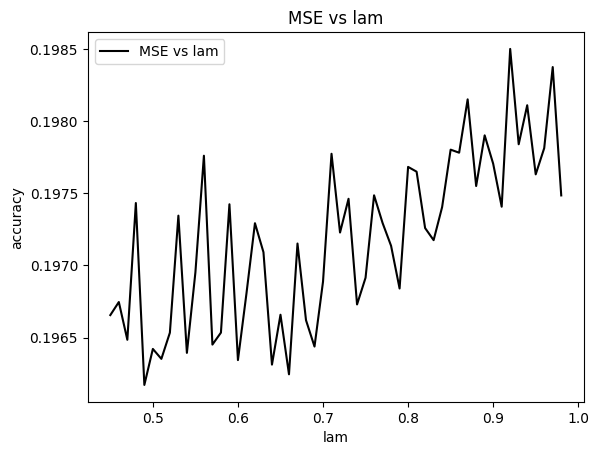

In [21]:
x_plot = np.arange(start = 0.45, stop = lam_val[lam_val.shape[0] -1], step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs lam')
plt.title('MSE vs lam')
plt.xlabel('lam')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
ret = techniques.train_ELM_L2_REG(xin = x, yin = y, p = p_n, control = True, lam = best_lam)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [23]:
xrange = np.linspace(start = -3, stop = 3, num = 100)
y_net = techniques.test_ELM(xin = xrange, Z = best_z, W = best_w, control = True, classification = False)

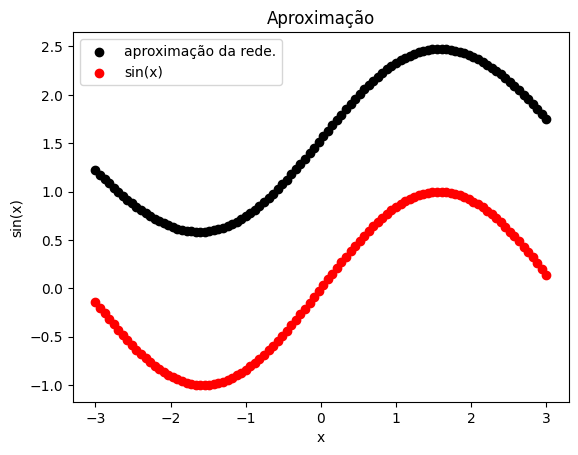

In [26]:
plt.scatter(xrange, y_net, color = 'black', label = 'aproximação da rede.')
plt.scatter(xrange, np.sin(xrange) , color = 'red', label = 'sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Aproximação')
plt.legend()
plt.show()